In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
cdict = dict()
c1 = [(4,-2), (3, -1), (3, -3), (3, -2)]
c2 = [(3, 0), (3, -4), (1, -2), (-1, 0)]
cdict['c1'] = c1
cdict['c2'] = c2

In [3]:
print(cdict)

{'c1': [(4, -2), (3, -1), (3, -3), (3, -2)], 'c2': [(3, 0), (3, -4), (1, -2), (-1, 0)]}


### 2(1)

In [4]:
def find_nearest_dot(dot, cdict):
    min_dist = float('inf')
    nearest_dot = None
    category = None
    for k, v in cdict.items():
        for d in v:
            dist = ((d[0] - dot[0]) ** 2 + (d[1] - dot[1]) ** 2) ** 0.5
            if dist < min_dist:
                min_dist = dist
                nearest_dot = d
                category = k
    return nearest_dot, category

In [5]:
dot_x = (0, 0)
nearest_dot, category = find_nearest_dot(dot_x, cdict)
print("The nearest dot to ({}, {}) is ({}, {}) in category {}".format(dot_x[0], dot_x[1], nearest_dot[0], nearest_dot[1], category))

The nearest dot to (0, 0) is (-1, 0) in category c2


Text(0.5, 1.0, 'initial 8 dots')

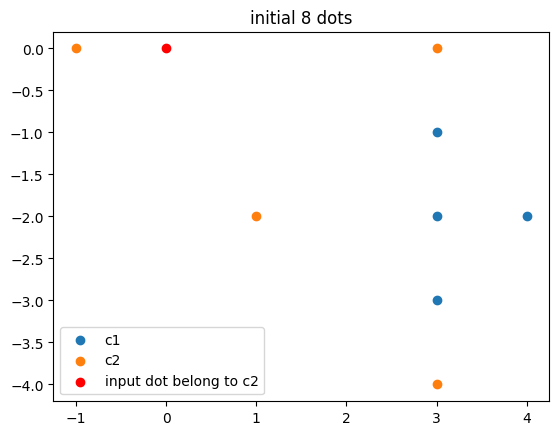

In [6]:
for k, v in cdict.items():
    x, y = zip(*v)
    plt.scatter(x, y, label=k)
plt.scatter(dot_x[0], dot_x[1], color='red', label='input dot belong to {}'.format(category))
plt.legend()
plt.title("initial 8 dots")

### 2(2)

In [7]:
minx = -1.1
maxx = 4.1
miny = -4.1
maxy = 0.1
lsx = np.linspace(minx, maxx, 500)
lsy = np.linspace(miny, maxy, 500)
XX, YY = np.meshgrid(lsx, lsy)
Z = np.zeros(XX.shape)

C:\Users\HanFaye\AppData\Local\Temp\ipykernel_8116\3415318514.py:12: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(XX, YY, Z, levels=[0, 1], colors='black', label='decison boundary')


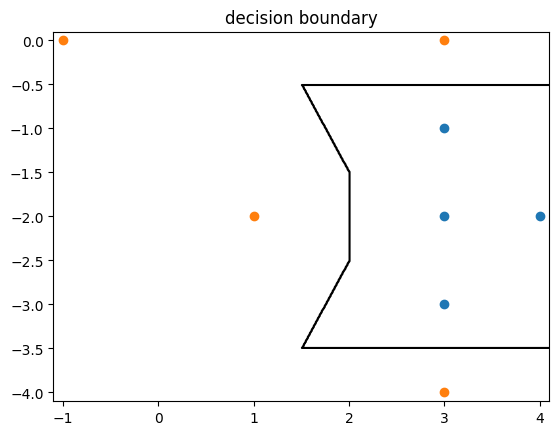

In [8]:
for i in range(XX.shape[0]):
    for j in range(XX.shape[1]):
        dot_x = (XX[i][j], YY[i][j])
        nearest_dot, category = find_nearest_dot(dot_x, cdict)
        if category == 'c1':
            Z[i][j] = 1
        else:
            Z[i][j] = 2
for k, v in cdict.items():
    x, y = zip(*v)
    plt.scatter(x, y, label=k)
plt.contour(XX, YY, Z, levels=[0, 1], colors='black', label='decison boundary')
plt.title("decision boundary")
plt.xlim(minx, maxx)
plt.ylim(miny, maxy)
plt.show()

### 2.(3)

In [9]:
def getclasscenter(ls):
    x = np.mean([i[0] for i in ls])
    y = np.mean([i[1] for i in ls])
    return (x, y)
c1_center = getclasscenter(cdict['c1'])
c2_center = getclasscenter(cdict['c2'])
print(f'c1类模板{c1_center}')
print(f'c2类模板{c2_center}')

c1类模板(3.25, -2.0)
c2类模板(1.5, -1.5)


In [10]:
def draw_chuizhipingfen_line(dot1, dot2):
    x1, y1 = dot1
    x2, y2 = dot2
    
    # 计算中点
    mid_x = (x1 + x2) / 2
    mid_y = (y1 + y2) / 2
    
    # 计算斜率
    if x2 - x1 == 0:  
        slope_perpendicular = None  
    else:
        slope = (y2 - y1) / (x2 - x1)  
        slope_perpendicular = -1 / slope 
    
    L = 10  
    if slope_perpendicular is not None:
        dx = L / ((1 + slope_perpendicular**2) ** 0.5)
        dy = slope_perpendicular * dx
        point1 = (mid_x + dx, mid_y + dy)  
        point2 = (mid_x - dx, mid_y - dy) 
    else:
        point1 = (mid_x, mid_y + L)
        point2 = (mid_x, mid_y - L)

    return point1, point2

In [11]:
center_dict = {'c1': [c1_center], 'c2': [c2_center]}
print(center_dict)

{'c1': [(3.25, -2.0)], 'c2': [(1.5, -1.5)]}


In [12]:
dot_x = (0, 0)
nearest_dot, category = find_nearest_dot(dot_x, center_dict)
print("最靠近({}, {})的模板是({}, {})，属于 {}".format(dot_x[0], dot_x[1], nearest_dot[0], nearest_dot[1], category))

最靠近(0, 0)的模板是(1.5, -1.5)，属于 c2


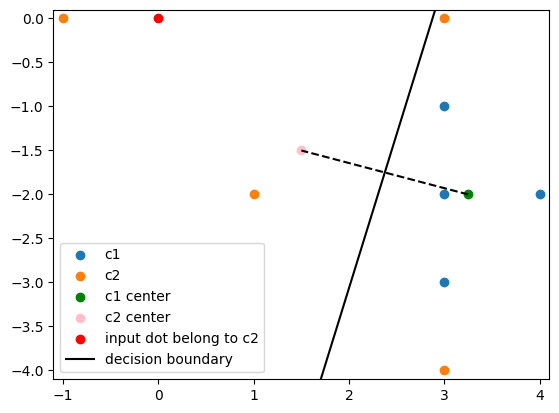

In [13]:
for k, v in cdict.items():
    x, y = zip(*v)
    plt.scatter(x, y, label=k)
plt.scatter(center_dict['c1'][0][0], center_dict['c1'][0][1], color='green', label='c1 center')
plt.scatter(center_dict['c2'][0][0], center_dict['c2'][0][1], color='pink', label='c2 center')
plt.scatter(dot_x[0], dot_x[1], color='red', label='input dot belong to {}'.format(category))
p1, p2 = draw_chuizhipingfen_line(center_dict['c1'][0], center_dict['c2'][0])
plt.plot([p1[0], p2[0]], [p1[1], p2[1]], color='black', label='decision boundary')
plt.plot([center_dict['c1'][0][0], center_dict['c2'][0][0]], [center_dict['c1'][0][1], center_dict['c2'][0][1]], color='black', linestyle='--')
plt.xlim(minx, maxx)
plt.ylim(miny, maxy)
plt.legend()
